You need to find a chessboard on an image. Once you do you need to figure out where all the pieces are. After that you need to figure out if either king is in check. For maximum points figure out if that check is a checkmate.

In [1]:
You are provided with a path to a folder in a form of <prefix>/<test_case_num> where <test_case_num> is the current test case. The folder's structure is as follows:

<test_case_num>:
│   <test_case_num>.png
│
├───pieces
│   ├───black
│   │       bishop.png
│   │       king.png
│   │       knight.png
│   │       pawn.png
│   │       queen.png
│   │       rook.png
│   │
│   └───white
│           bishop.png
│           king.png
│           knight.png
│           pawn.png
│           queen.png
│           rook.png
│
└───tiles
        black.png
        white.png

SyntaxError: invalid syntax (<ipython-input-1-aea5c79cabc0>, line 1)

0,0 is at the top left corner of the larger picture. From this point if you move down you increase the first coordinate, and if you move to the right you increase the second coordinate.

In [3]:
!pwd

/e/machine_learning/projects/petnica-ml7/checkmate


In [5]:
import os
import PIL
from PIL import Image
import numpy as np

In [6]:
chessboard_dim=8
black_tile_px_val=[180, 136, 102]
white_tile_px_val=[240, 217, 183]
nothing_px_val=[0,0,0]

In [7]:
test_case=0

data_pth=os.path.join('data\\public\set\\',str(test_case))

img_pths={}
img_pths['input']=os.path.join(data_pth,str(test_case)+'.png')

for root, dirs, files in os.walk(data_pth, topdown=False):
    for name in files:
        if not name.split('.')[0].isnumeric():
            desc=os.path.normpath(root).split(os.path.sep)[-1]
            dict_key_name=desc+'_'+name.split('.')[0]
            img_pths[dict_key_name]=os.path.join(root,name)


In [8]:
img_pths

{'input': 'data\\public\\set\\0\\0.png',
 'black_bishop': 'data\\public\\set\\0\\pieces\\black\\bishop.png',
 'black_king': 'data\\public\\set\\0\\pieces\\black\\king.png',
 'black_knight': 'data\\public\\set\\0\\pieces\\black\\knight.png',
 'black_pawn': 'data\\public\\set\\0\\pieces\\black\\pawn.png',
 'black_queen': 'data\\public\\set\\0\\pieces\\black\\queen.png',
 'black_rook': 'data\\public\\set\\0\\pieces\\black\\rook.png',
 'white_bishop': 'data\\public\\set\\0\\pieces\\white\\bishop.png',
 'white_king': 'data\\public\\set\\0\\pieces\\white\\king.png',
 'white_knight': 'data\\public\\set\\0\\pieces\\white\\knight.png',
 'white_pawn': 'data\\public\\set\\0\\pieces\\white\\pawn.png',
 'white_queen': 'data\\public\\set\\0\\pieces\\white\\queen.png',
 'white_rook': 'data\\public\\set\\0\\pieces\\white\\rook.png',
 'tiles_black': 'data\\public\\set\\0\\tiles\\black.png',
 'tiles_white': 'data\\public\\set\\0\\tiles\\white.png'}

In [9]:
a=np.asarray(Image.open(img_pths['input']))

In [74]:
a

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
a.shape

(514, 425, 3)

In [41]:
def find_beggining(img):
    beggining_found=False
    beggining_position=None
    offset=None
    for row_px in range(img.shape[0]):
        for col_px in range(img.shape[1]):
            position_px_val=img[row_px,col_px,:]
            if np.array_equal(position_px_val,white_tile_px_val) and not beggining_found:
                beggining_position=np.array([row_px,col_px])
                beggining_found=True
            
            if np.array_equal(position_px_val,black_tile_px_val):
                offset=(np.array([row_px,col_px])-beggining_position)[1]
                break
        if beggining_found:
            break
    
    print(','.join(map(str,beggining_position)))
    return beggining_position, offset
    
img=np.asarray(Image.open(img_pths['input']))
print(find_beggining(img))

140,62
(array([140,  62]), 30)


In [42]:
def cut_chessboard(img, begging_position, offset):
    return img[begging_position[0]:begging_position[0]+8*offset,
              begging_position[1]:begging_position[1]+8*offset,
              :]

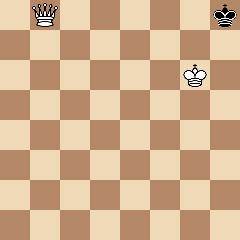

In [46]:
im=Image.fromarray(cut_chessboard(img, [140,62], 30))
im

In [104]:
fig_to_int={
    'bishop':1,
    'king':2,
    'knight':3,
    'pawn':4,
    'queen':5,
    'rook':6
           }

def find_figures(img, offset):
    
    crops=[]
    for i in range(0,offset*8, offset):
        for j in range(0,offset*8, offset):
            crop=img[i:i+offset,j:j+offset]
            crops.append(crop)
            display(Image.fromarray(crop))
    return crops
crops=find_figures(cut_chessboard(img,[140,62],30),30)

In [58]:
list(range(0,30*8, 30))

[0, 30, 60, 90, 120, 150, 180, 210]

In [96]:
png=Image.open(img_pths['black_bishop']).resize((30,30))

In [97]:
?Image.open

In [98]:
png

In [99]:
print(np.unique(np.array(png)))

[  0   3   4   5  11  12  14  15  16  17  21  24  28  34  38  43  56  64
  70  71  77  78  81  84  86  87  92  93  94 102 108 109 116 117 119 120
 125 130 137 138 148 155 157 158 159 161 162 164 165 169 170 181 182 187
 189 190 191 192 195 202 203 204 211 217 218 222 223 224 226 227 228 229
 234 235 236 244 249 254 255]


In [108]:
display(Image.fromarray(crops[1]))

In [134]:
white_queen_on_black=crops[1]
print(white_queen_on_black.shape)
white_queen_on_black[:1]

(30, 30, 3)

In [146]:
white_queen=Image.open(img_pths['white_queen']).convert('RGB').resize((30,30))
white_queen

In [153]:
white_queen=np.array(white_queen)
white_queen.shape

(30, 30, 3)

In [154]:
white_queen[:1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [157]:
import numpy.ma as ma

In [ ]:
ma.masked_greated(a,)

In [155]:
# np.unique(white_queen.reshape(-1, white_queen.shape[2]), axis=0)

In [156]:
# np.unique(white_queen_on_black.reshape(-1, white_queen_on_black.shape[2]), axis=0)